# 라이브러리 및 데이터 불러오기

In [16]:
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

In [17]:
df = pd.read_csv("./data/countries.csv")

In [18]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Southern Asia,NaN,Asia,33.939110,67.709953
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,NaN,Europe,41.153332,20.168331
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,NaN,Africa,28.033886,1.659626
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Sub-Saharan Africa,Africa,-11.202692,17.873887
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Caribbean,Latin America and the Caribbean,North America,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Melanesia,NaN,Oceania,-15.376706,166.959158
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0,South America,Latin America and the Caribbean,South America,6.423750,-66.589730
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,South-eastern Asia,NaN,Asia,14.058324,108.277199
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,Western Asia,NaN,Asia,15.552727,48.516388


# 데이터 전처리

## 결측치 확인

In [19]:
df.isnull().sum()

country         0
child_mort      0
exports         0
health          0
imports         0
income          0
inflation       0
life_expec      0
total_fer       0
gdpp            0
region_1        0
region_2      101
continent       0
latitude        0
longitude       0
dtype: int64

In [20]:
df["region_2"].unique()

array([nan, 'Sub-Saharan Africa', 'Latin America and the Caribbean'],
      dtype=object)

In [21]:
df.drop("region_2", axis = 1, inplace = True)

In [22]:
df.rename(columns = {"region_1":"region"}, inplace = True)

In [23]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Southern Asia,Asia,33.939110,67.709953
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,Europe,41.153332,20.168331
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,Africa,28.033886,1.659626
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Africa,-11.202692,17.873887
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Caribbean,North America,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0,Melanesia,Oceania,-15.376706,166.959158
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0,South America,South America,6.423750,-66.589730
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0,South-eastern Asia,Asia,14.058324,108.277199
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0,Western Asia,Asia,15.552727,48.516388


In [24]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
region        0
continent     0
latitude      0
longitude     0
dtype: int64

## 데이터 변환

In [25]:
e = []
h = []
i = []

for x in range(len(df)):
    e.append((df.iloc[x]["gdpp"] / 100) * df.iloc[x]["exports"])
    h.append((df.iloc[x]["gdpp"] / 100) * df.iloc[x]["health"])
    i.append((df.iloc[x]["gdpp"] / 100) * df.iloc[x]["imports"])

In [26]:
df.drop(["exports", "health", "imports"], axis = 1, inplace = True)

In [27]:
df["exports"] = e
df["health"] = h
df["imports"] = i

In [28]:
df = df[["country", "child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp", "region", "continent", "latitude", "longitude"]]

In [29]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,Southern Asia,Asia,33.939110,67.709953
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,Europe,41.153332,20.168331
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,Africa,28.033886,1.659626
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Africa,-11.202692,17.873887
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,Caribbean,North America,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970.0,Melanesia,Oceania,-15.376706,166.959158
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.47,13500.0,South America,South America,6.423750,-66.589730
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310.0,South-eastern Asia,Asia,14.058324,108.277199
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310.0,Western Asia,Asia,15.552727,48.516388


# EDA

## 대륙 별 평균 확인

In [30]:
avg_df = df.groupby("continent").mean(numeric_only = True)

In [31]:
avg_df = avg_df.drop(["latitude", "longitude"], axis = 1)

In [32]:
avg_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
continent,,,,,,,,,
Africa,82.155319,1424.041128,137.449087,1327.895745,5627.510638,10.730553,61.504255,4.671277,2644.617021
Asia,29.773333,7621.005078,558.497751,5769.554846,20924.444444,10.522711,72.651111,2.594667,11731.444444
Europe,6.184615,18336.020256,2746.897897,16562.588974,29930.256410,2.803590,77.497436,1.599744,28534.102564
North America,30.020000,4009.195733,1448.965947,5027.166933,15960.666667,3.277867,72.440000,2.309333,13522.133333
Oceania,25.711111,2992.762222,1039.541111,3634.203333,11247.777778,3.252222,68.933333,3.340000,11651.111111
South America,22.258333,2265.883333,555.213500,2013.119167,12429.166667,11.160833,74.450000,2.409167,7690.000000


In [33]:
avg_df.index

Index(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'],
      dtype='object', name='continent')

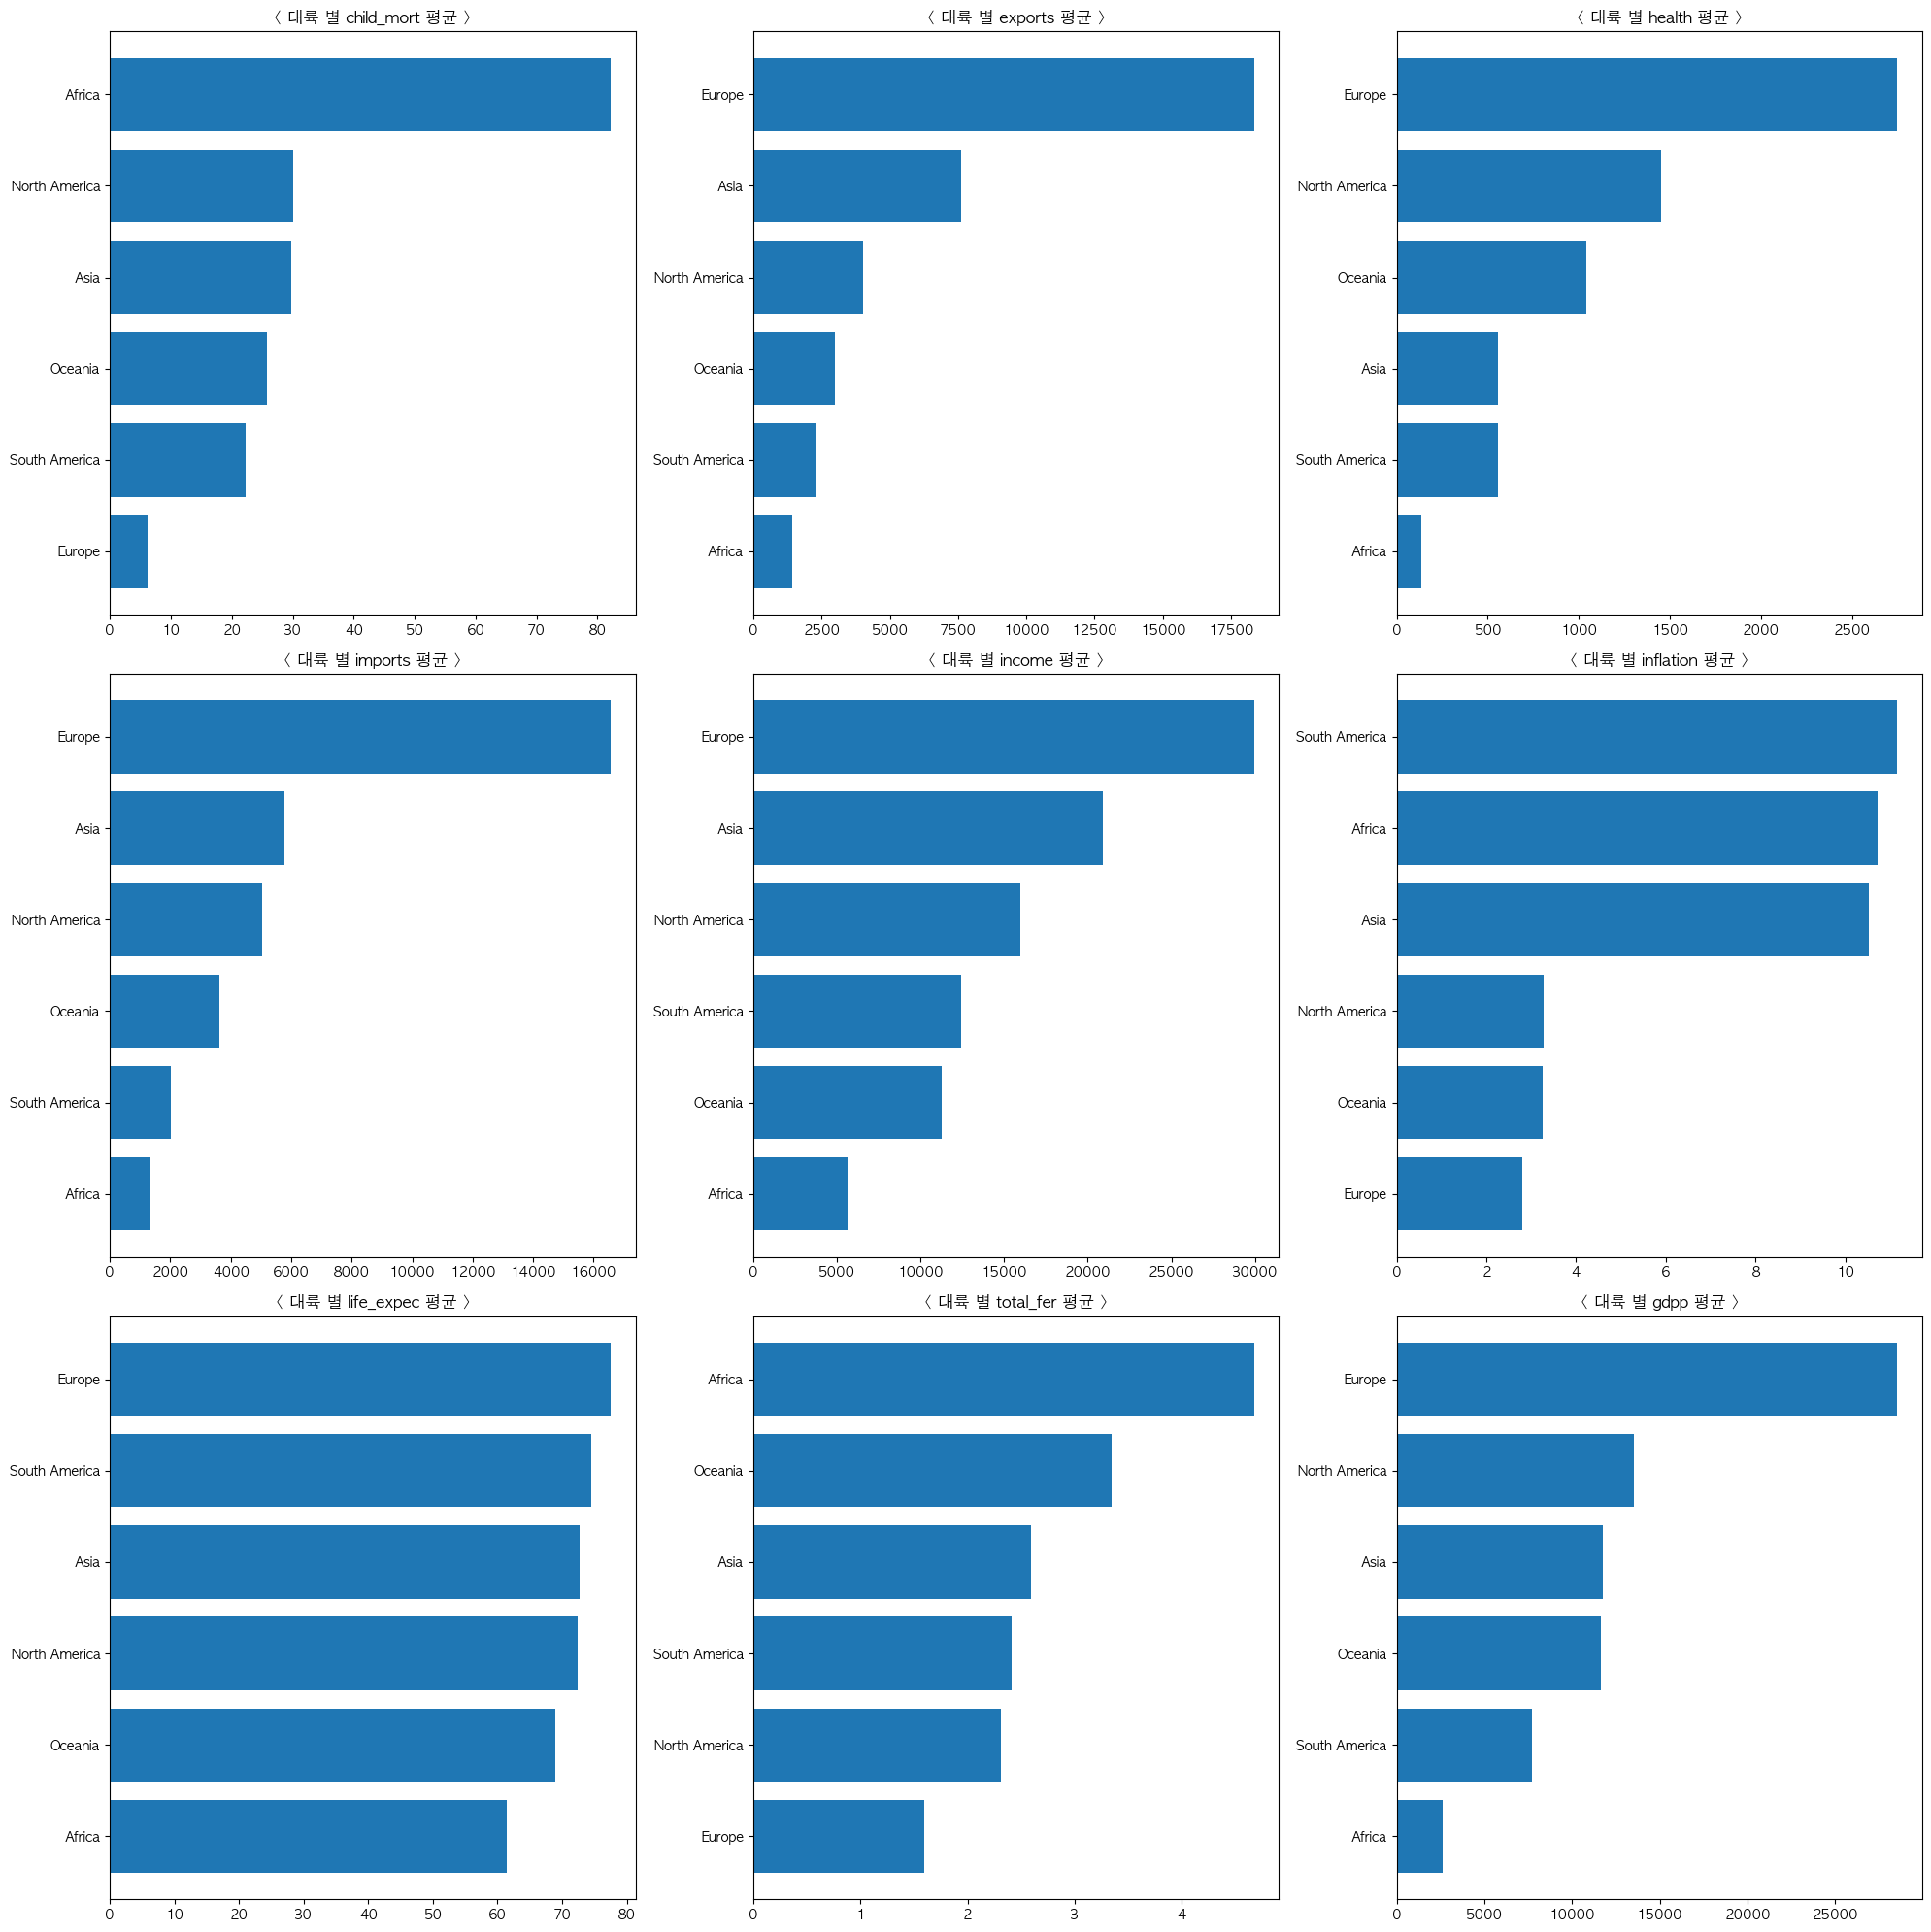

In [34]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

for i, column in enumerate(avg_df.columns):
    row = i // 3
    col = i % 3
    sorted_means = avg_df[column].sort_values(ascending=True)
    axes[row, col].barh(sorted_means.index, sorted_means)
    axes[row, col].set_title(f"< 대륙 별 {column} 평균 >")
    # axes[row, col].tick_params(axis='x', rotation=)
plt.tight_layout()

## 각 컬럼 별 top / lower 확인하기

In [26]:
df

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude,exports,health,imports
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,Southern Asia,Asia,33.939110,67.709953,55.30,41.9174,248.297
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,Europe,41.153332,20.168331,1145.20,267.8950,1987.740
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,Africa,28.033886,1.659626,1712.64,185.9820,1400.440
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Africa,-11.202692,17.873887,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,Caribbean,North America,17.060816,-61.796428,5551.00,735.6600,7185.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,2950.0,2.62,63.0,3.50,2970.0,Melanesia,Oceania,-15.376706,166.959158,1384.02,155.9250,1565.190
163,Venezuela,17.1,16500.0,45.90,75.4,2.47,13500.0,South America,South America,6.423750,-66.589730,3847.50,662.8500,2376.000
164,Vietnam,23.3,4490.0,12.10,73.1,1.95,1310.0,South-eastern Asia,Asia,14.058324,108.277199,943.20,89.6040,1050.620
165,Yemen,56.3,4480.0,23.60,67.5,4.67,1310.0,Western Asia,Asia,15.552727,48.516388,393.00,67.8580,450.640


### child_mort

In [35]:
child_top_df = df.sort_values(["child_mort"], ascending = False)[:10]

In [36]:
child_low_df = df.sort_values(["child_mort"], ascending = True)[:10]

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1494/3455723685.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = child_top_df["country"], x = child_top_df["child_mort"], orient = "h", palette="husl")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1494/3455723685.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = child_low_df["country"], x = child_low_df["child_mort"], orient = "h", palette="viridis")


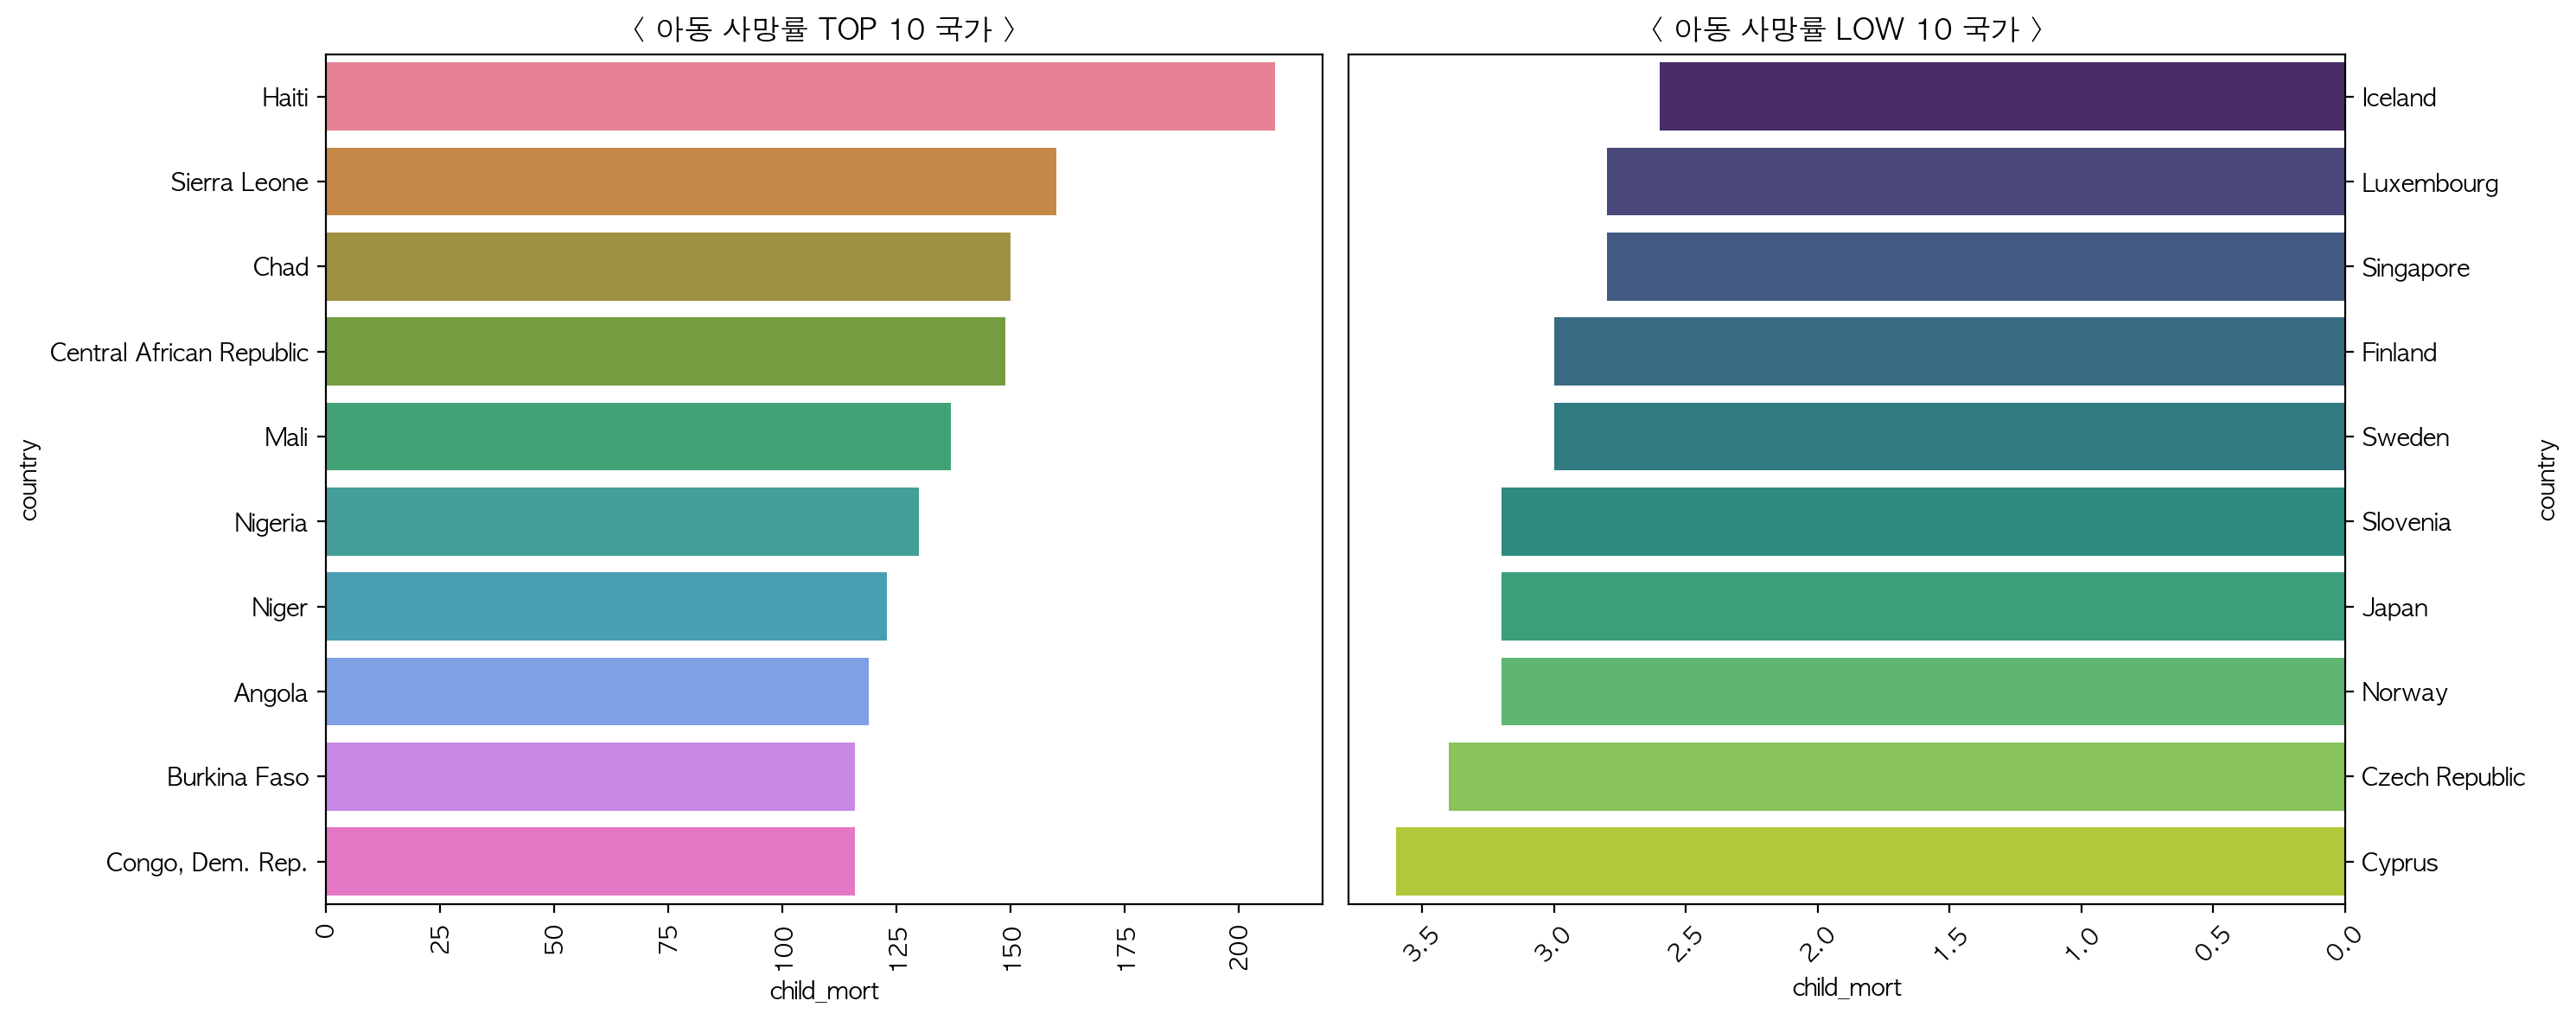

In [37]:
plt.figure(figsize = (15, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.barplot(y = child_top_df["country"], x = child_top_df["child_mort"], orient = "h", palette="husl")
plt.xticks(rotation = 90)
plt.title("< 아동 사망률 TOP 10 국가 >")

plt.subplot(1, 2, 2)
sns.barplot(y = child_low_df["country"], x = child_low_df["child_mort"], orient = "h", palette="viridis")
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.xticks(rotation = 45)
plt.title("< 아동 사망률 LOW 10 국가 >")
plt.tight_layout()

In [40]:
child_low_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude
68,Iceland,2.6,22374.6,3938.60,18142.7,38800.0,5.470,82.0,2.20,41900.0,Northern Europe,Europe,64.963051,-19.020835
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700.0,3.620,81.3,1.63,105000.0,Western Europe,Europe,49.815273,6.129583
133,Singapore,2.8,93200.0,1845.36,81084.0,72100.0,-0.046,82.7,1.15,46600.0,South-eastern Asia,Asia,1.352083,103.819836
53,Finland,3.0,17879.4,4134.90,17278.8,39800.0,0.351,80.0,1.87,46200.0,Northern Europe,Europe,61.924110,25.748151
144,Sweden,3.0,24070.2,5017.23,21204.7,42900.0,0.991,81.5,1.98,52100.0,Northern Europe,Europe,60.128161,18.643501
135,Slovenia,3.2,15046.2,2201.94,14718.6,28700.0,-0.987,79.5,1.57,23400.0,Southern Europe,Europe,46.151241,14.995463
77,Japan,3.2,6675.0,4223.05,6052.0,35800.0,-1.900,82.8,1.39,44500.0,Eastern Asia,Asia,36.204824,138.252924
114,Norway,3.2,34856.6,8323.44,25023.0,62300.0,5.950,81.0,1.95,87800.0,Northern Europe,Europe,60.472024,8.468946
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300.0,-1.430,77.5,1.51,19800.0,Eastern Europe,Europe,49.817492,15.472962
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900.0,2.010,79.9,1.42,30800.0,Western Asia,Asia,35.126413,33.429859


### income

In [37]:
income_top_df = df.sort_values(["income"], ascending = False)[:10]

In [38]:
income_low_df = df.sort_values(["income"], ascending = True)[:10]

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2103/1034522866.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = income_top_df["country"], x = income_top_df["income"], orient = "h", palette="husl")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2103/1034522866.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = income_low_df["country"], x = income_low_df["income"], orient = "h", palette="viridis")


Text(0.5, 1.0, '< 개인 당 순소득 LOW 10 국가 >')

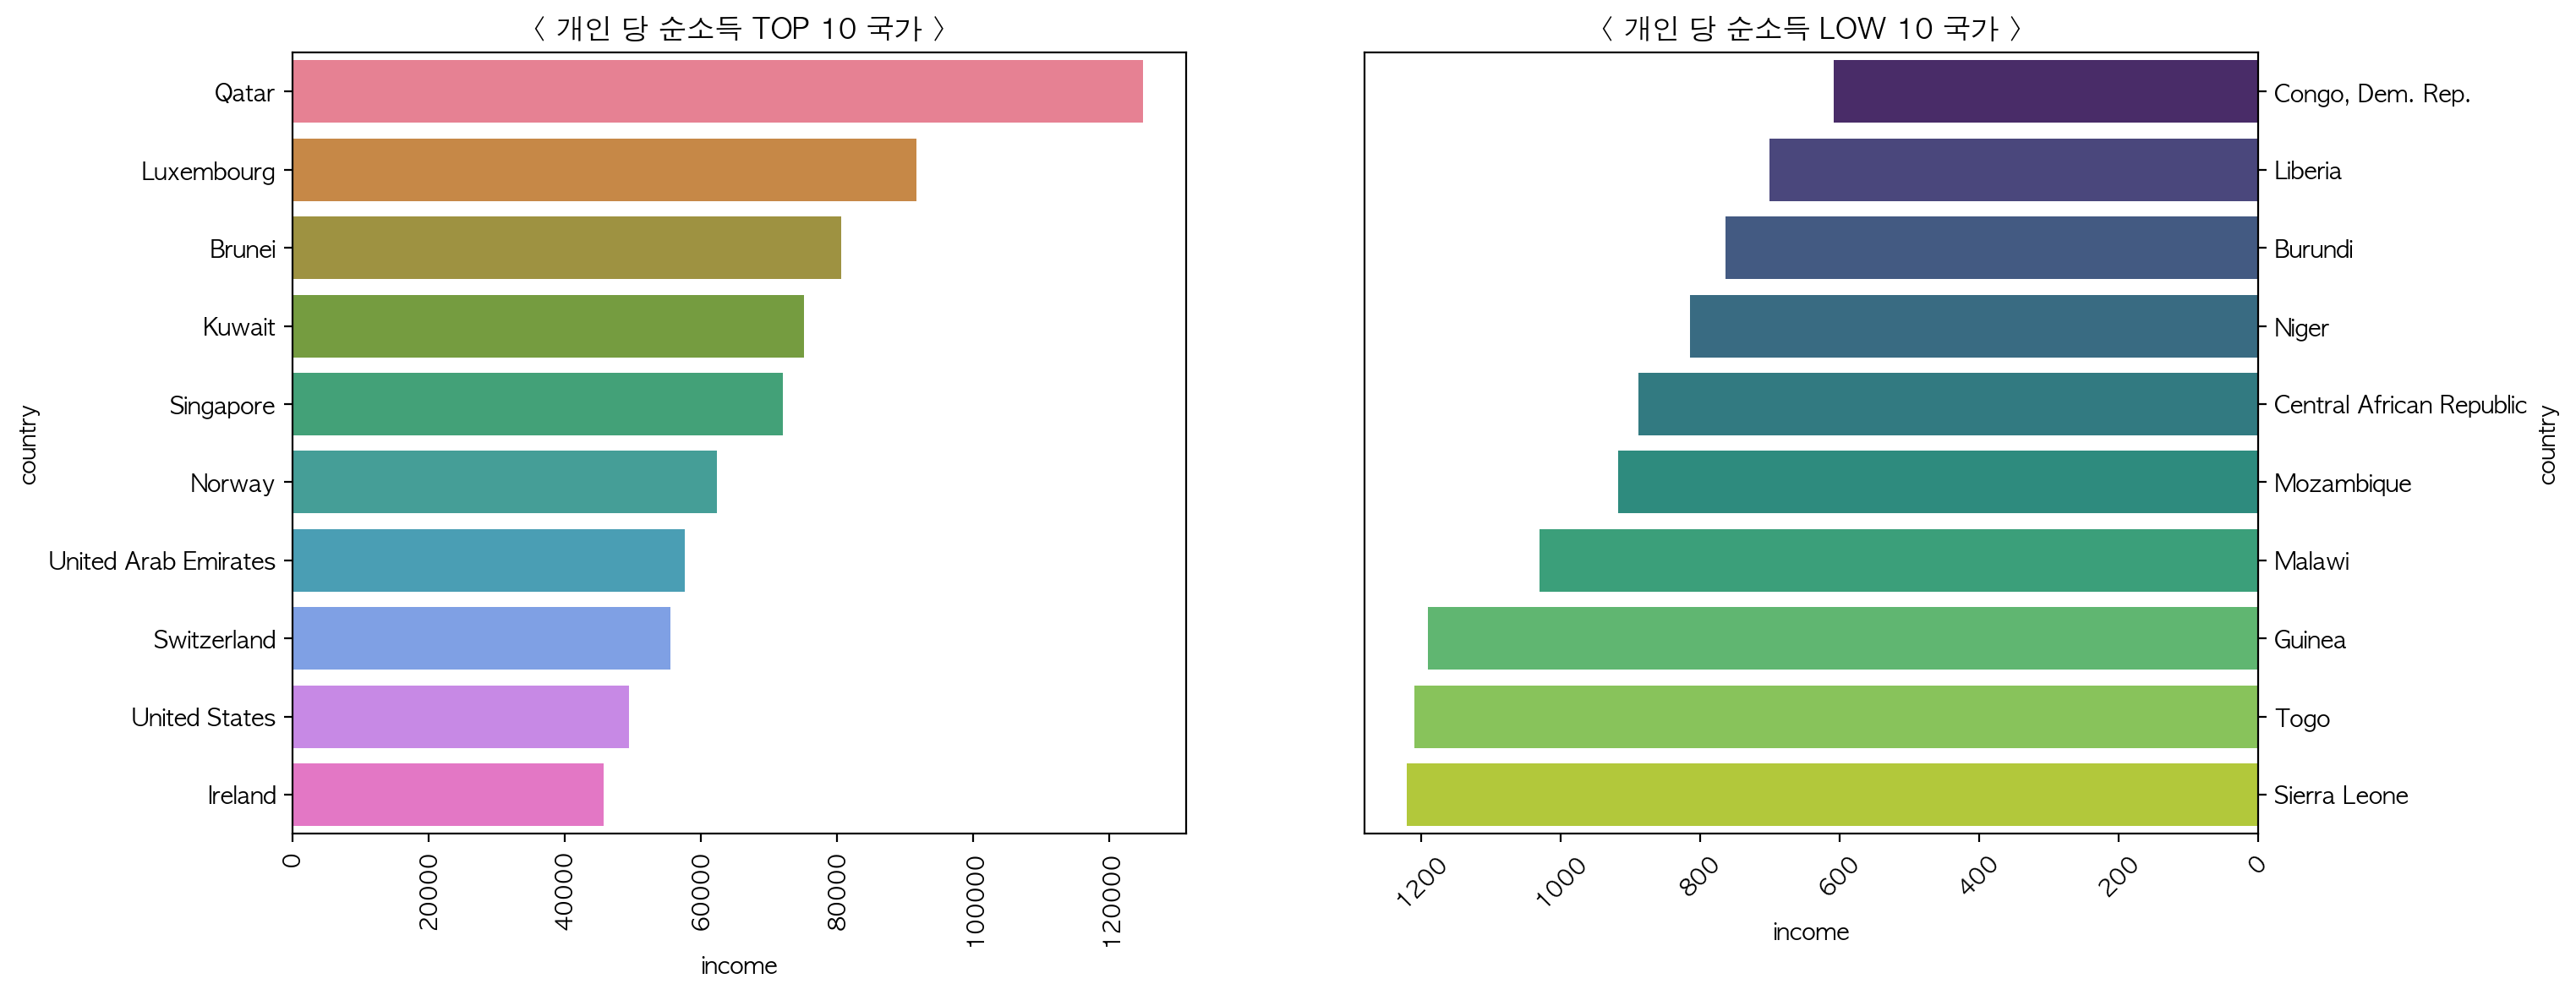

In [39]:
plt.figure(figsize = (15, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.barplot(y = income_top_df["country"], x = income_top_df["income"], orient = "h", palette="husl")
plt.xticks(rotation = 90)
plt.title("< 개인 당 순소득 TOP 10 국가 >")

plt.subplot(1, 2, 2)
sns.barplot(y = income_low_df["country"], x = income_low_df["income"], orient = "h", palette="viridis")
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.xticks(rotation = 45)
plt.title("< 개인 당 순소득 LOW 10 국가 >")

### inflation

In [40]:
inflation_top_df = df.sort_values(["inflation"], ascending = False)[:10]

In [41]:
inflation_low_df = df.sort_values(["inflation"], ascending = True)[:10]

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2103/2623375740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = inflation_top_df["country"], x = inflation_top_df["inflation"], orient = "h", palette="husl")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2103/2623375740.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = inflation_low_df["country"], x = inflation_low_df["inflation"], orient = "h", palette="viridis")


Text(0.5, 1.0, '< GDP 연간 성장률 LOW 10 국가 >')

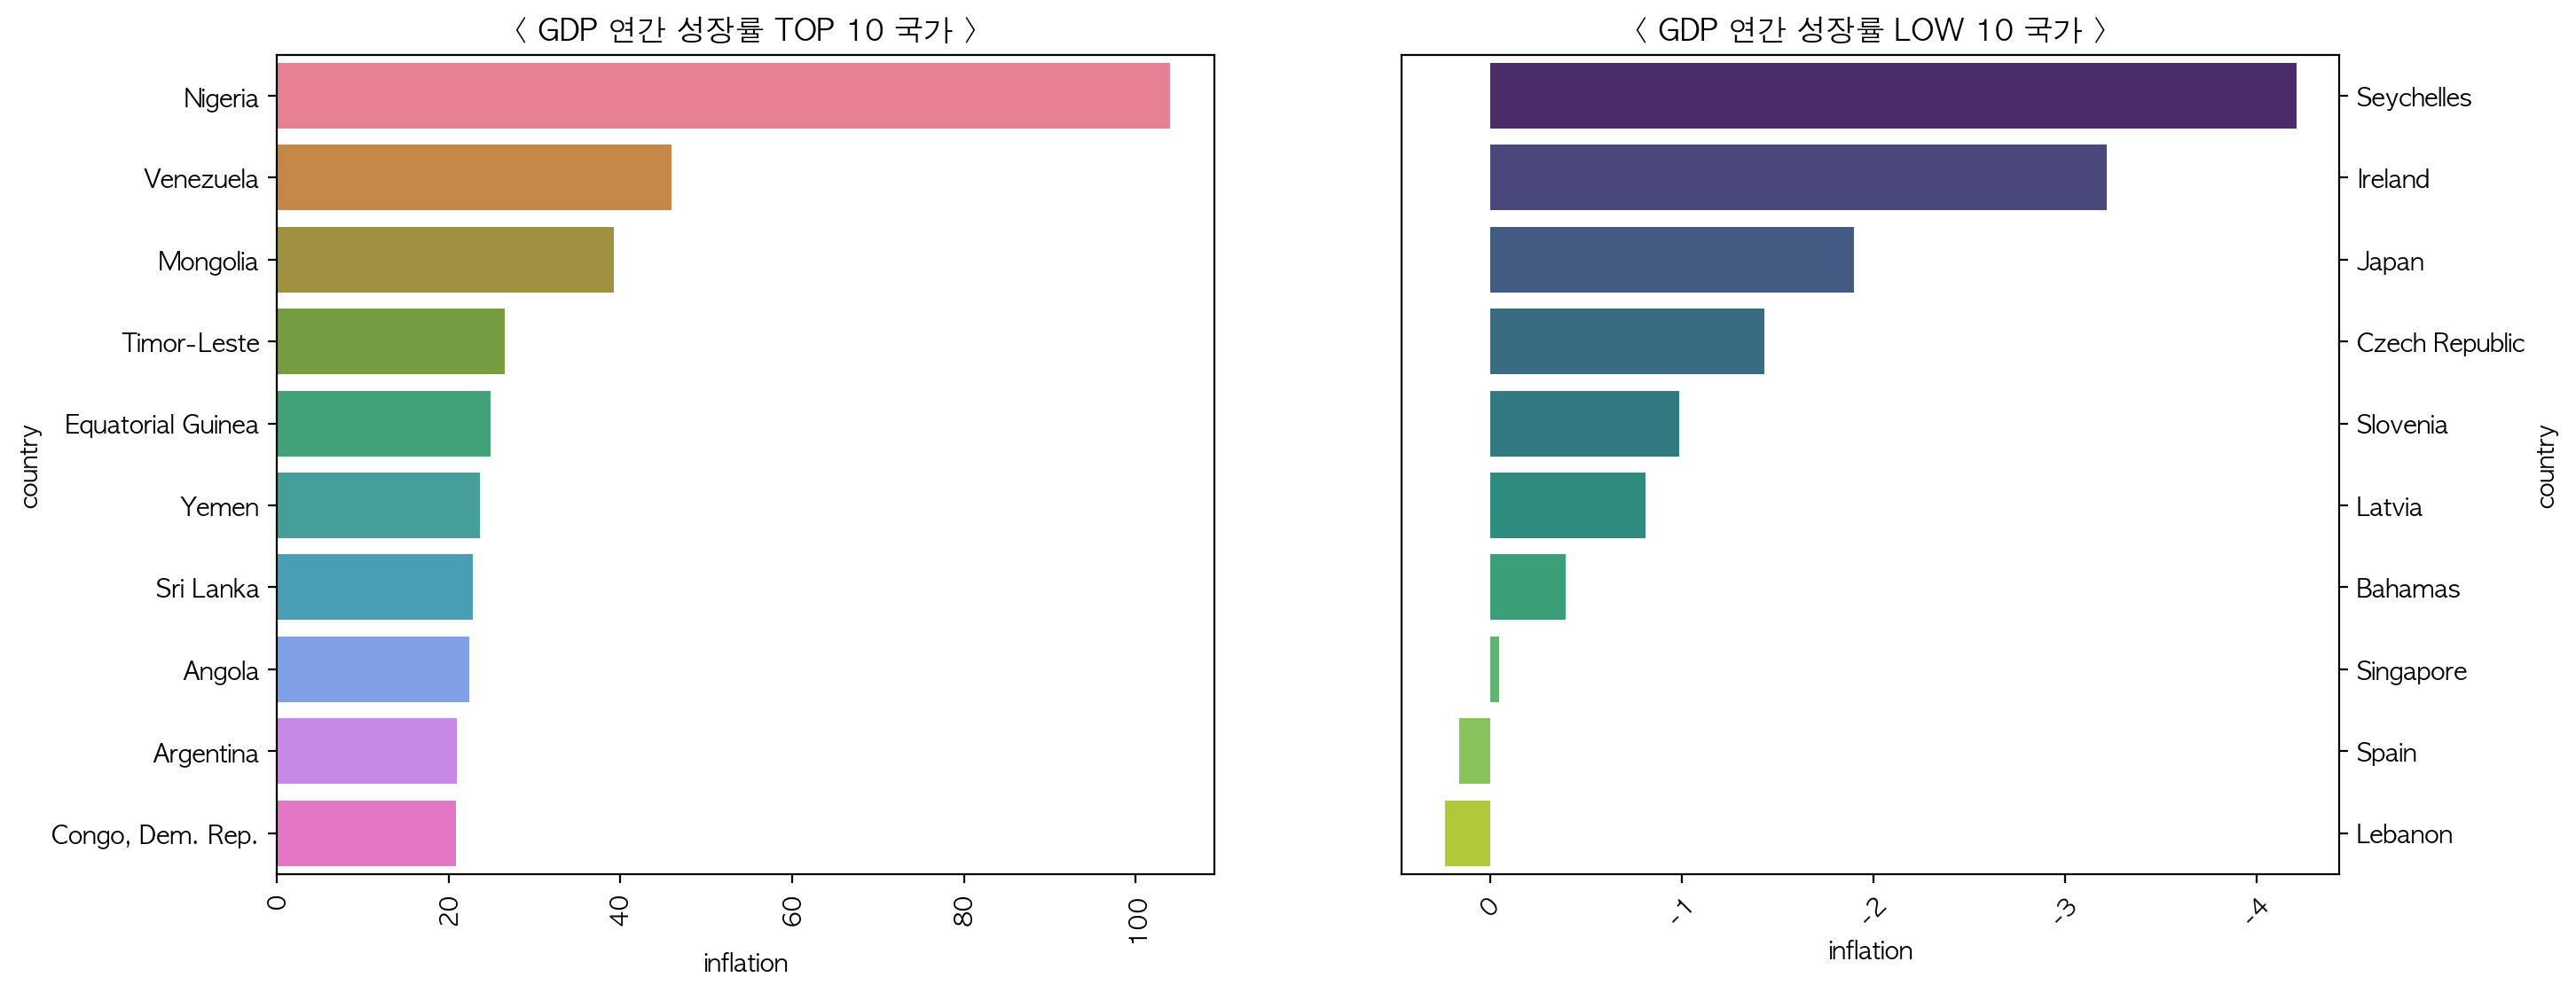

In [42]:
plt.figure(figsize = (15, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.barplot(y = inflation_top_df["country"], x = inflation_top_df["inflation"], orient = "h", palette="husl")
plt.xticks(rotation = 90)
plt.title("< GDP 연간 성장률 TOP 10 국가 >")

plt.subplot(1, 2, 2)
sns.barplot(y = inflation_low_df["country"], x = inflation_low_df["inflation"], orient = "h", palette="viridis")
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.xticks(rotation = 45)
plt.title("< GDP 연간 성장률 LOW 10 국가 >")

### life_expec

In [41]:
life_top_df = df.sort_values(["life_expec"], ascending = False)[:10]

In [42]:
life_low_df = df.sort_values(["life_expec"], ascending = True)[:10]

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1494/1675800269.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = life_top_df["country"], x = life_top_df["life_expec"], orient = "h", palette="husl")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1494/1675800269.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = life_low_df["country"], x = life_low_df["life_expec"], orient = "h", palette="viridis")


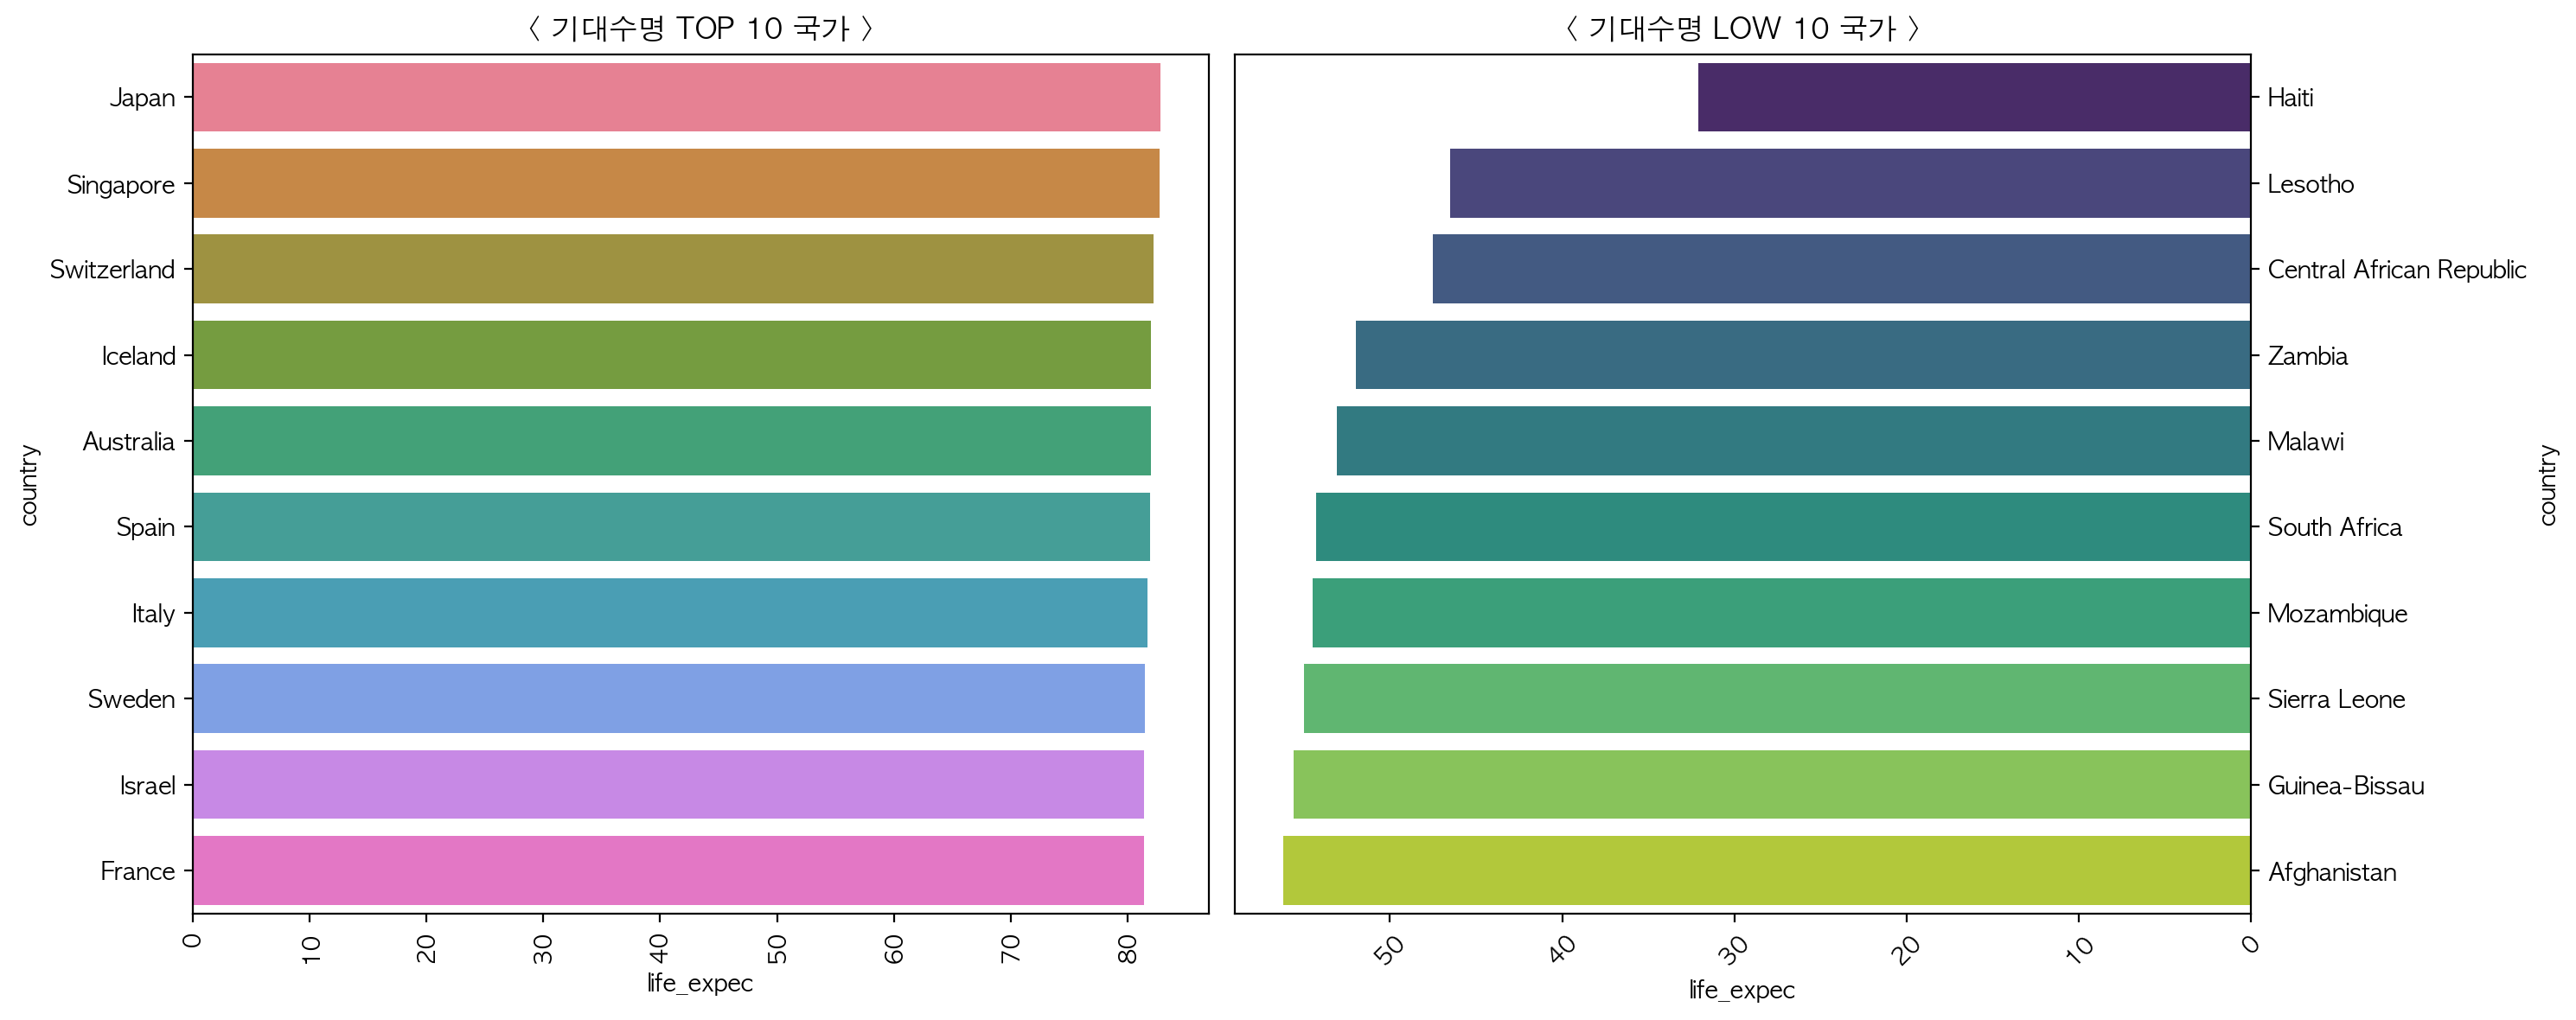

In [43]:
plt.figure(figsize = (15, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.barplot(y = life_top_df["country"], x = life_top_df["life_expec"], orient = "h", palette="husl")
plt.xticks(rotation = 90)
plt.title("< 기대수명 TOP 10 국가 >")

plt.subplot(1, 2, 2)
sns.barplot(y = life_low_df["country"], x = life_low_df["life_expec"], orient = "h", palette="viridis")
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.xticks(rotation = 45)
plt.title("< 기대수명 LOW 10 국가 >")
plt.tight_layout()

### total_fer

In [46]:
fer_top_df = df.sort_values(["total_fer"], ascending = False)[:10]

In [47]:
fer_low_df = df.sort_values(["total_fer"], ascending = True)[:10]

In [51]:
fer_low_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude
133,Singapore,2.8,93200.00,1845.36,81084.00,72100.0,-0.046,82.7,1.15,46600.0,South-eastern Asia,Asia,1.352083,103.819836
138,South Korea,4.1,10917.40,1531.53,10210.20,30400.0,3.160,80.1,1.23,22100.0,Eastern Asia,Asia,35.907757,127.766922
67,Hungary,6.0,10715.80,960.23,10021.50,22300.0,2.330,74.5,1.25,13100.0,Eastern Europe,Europe,47.162494,19.503304
102,Moldova,17.2,638.96,190.71,1279.55,3910.0,11.100,69.7,1.27,1630.0,Eastern Europe,Europe,47.411631,28.369885
20,Bosnia and Herzegovina,6.9,1369.17,511.71,2364.93,9720.0,1.400,76.8,1.31,4610.0,Southern Europe,Europe,43.915886,17.679076
98,Malta,6.8,32283.00,1825.15,32494.00,28300.0,3.830,80.3,1.36,21100.0,Southern Europe,Europe,35.937496,14.375416
85,Latvia,7.8,6068.10,754.84,6226.30,18300.0,-0.812,73.1,1.36,11300.0,Northern Europe,Europe,56.879635,24.603189
139,Spain,3.8,7828.50,2928.78,8227.60,32500.0,0.160,81.9,1.37,30700.0,Southern Europe,Europe,40.463667,-3.749220
77,Japan,3.2,6675.00,4223.05,6052.00,35800.0,-1.900,82.8,1.39,44500.0,Eastern Asia,Asia,36.204824,138.252924
122,Portugal,3.9,6727.50,2475.00,8415.00,27200.0,0.643,79.8,1.39,22500.0,Southern Europe,Europe,39.399872,-8.224454


/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1494/3281953941.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = fer_top_df["country"], x = fer_top_df["total_fer"], orient = "h", palette="husl")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1494/3281953941.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = fer_low_df["country"], x = fer_low_df["total_fer"], orient = "h", palette="viridis")


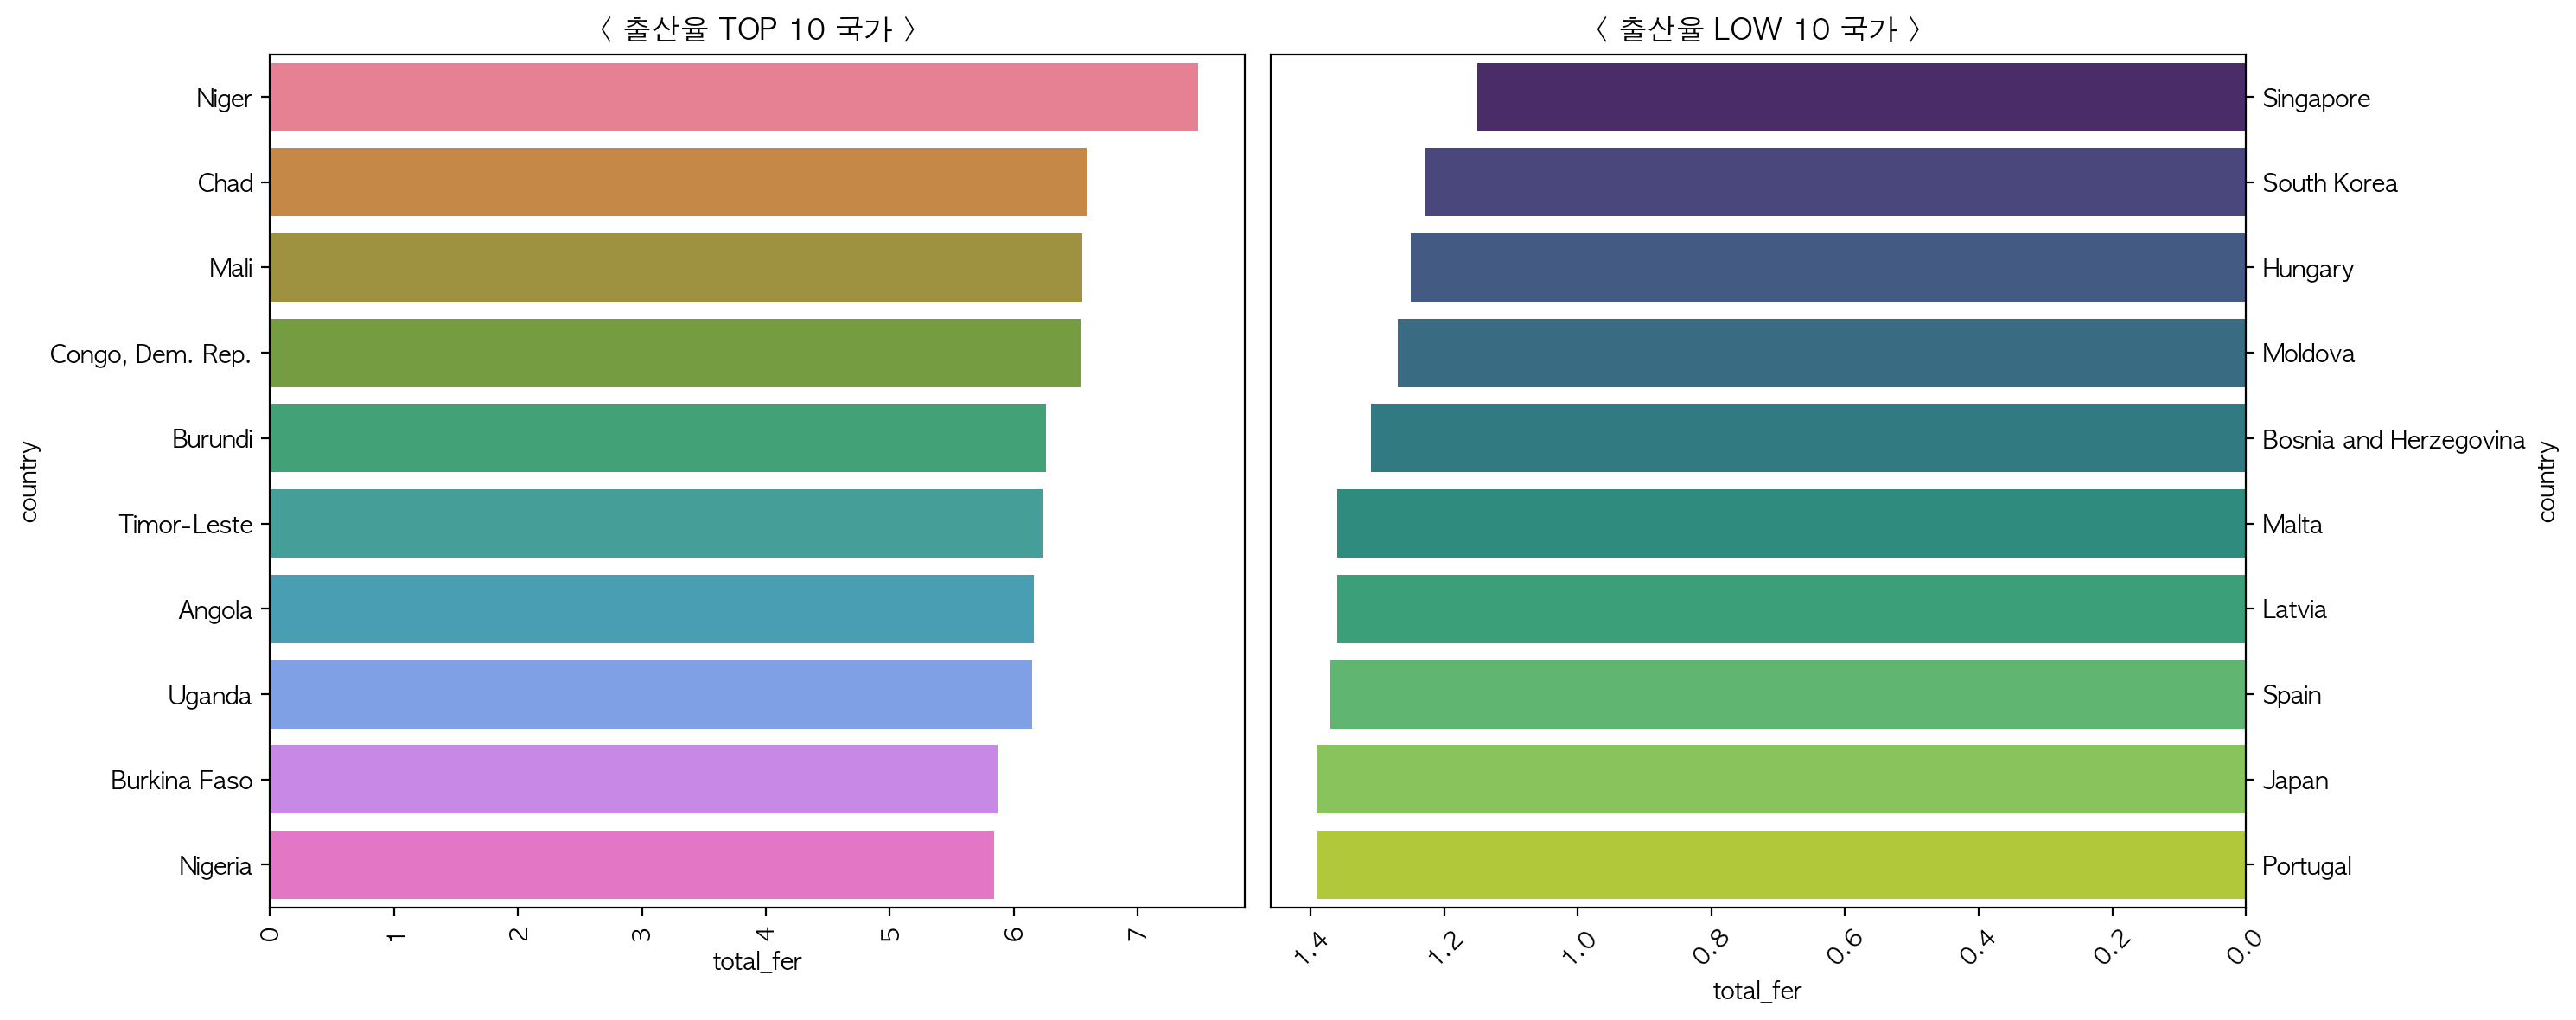

In [48]:
plt.figure(figsize = (15, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.barplot(y = fer_top_df["country"], x = fer_top_df["total_fer"], orient = "h", palette="husl")
plt.xticks(rotation = 90)
plt.title("< 출산율 TOP 10 국가 >")

plt.subplot(1, 2, 2)
sns.barplot(y = fer_low_df["country"], x = fer_low_df["total_fer"], orient = "h", palette="viridis")
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.xticks(rotation = 45)
plt.title("< 출산율 LOW 10 국가 >")
plt.tight_layout()

### gdpp

In [52]:
gdpp_top_df = df.sort_values(["gdpp"], ascending = False)[:10]

In [53]:
gdpp_low_df = df.sort_values(["gdpp"], ascending = True)[:10]

In [63]:
gdpp_low_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,Eastern Africa,Africa,-3.373056,29.918886
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,Western Africa,Africa,6.428055,-9.429499
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,Middle Africa,Africa,-4.038333,21.758664
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,Western Africa,Africa,17.607789,8.081666
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,Western Africa,Africa,8.460555,-11.779889
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,Eastern Africa,Africa,-18.766947,46.869107
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,Eastern Africa,Africa,-18.665695,35.529562
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,Middle Africa,Africa,6.611111,20.939444
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,Eastern Africa,Africa,-13.254308,34.301525
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,Eastern Africa,Africa,15.179384,39.782334


/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1494/2536812603.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = gdpp_top_df["country"], x = gdpp_top_df["gdpp"], orient = "h", palette="husl")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1494/2536812603.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = gdpp_low_df["country"], x = gdpp_low_df["gdpp"], orient = "h", palette="viridis")


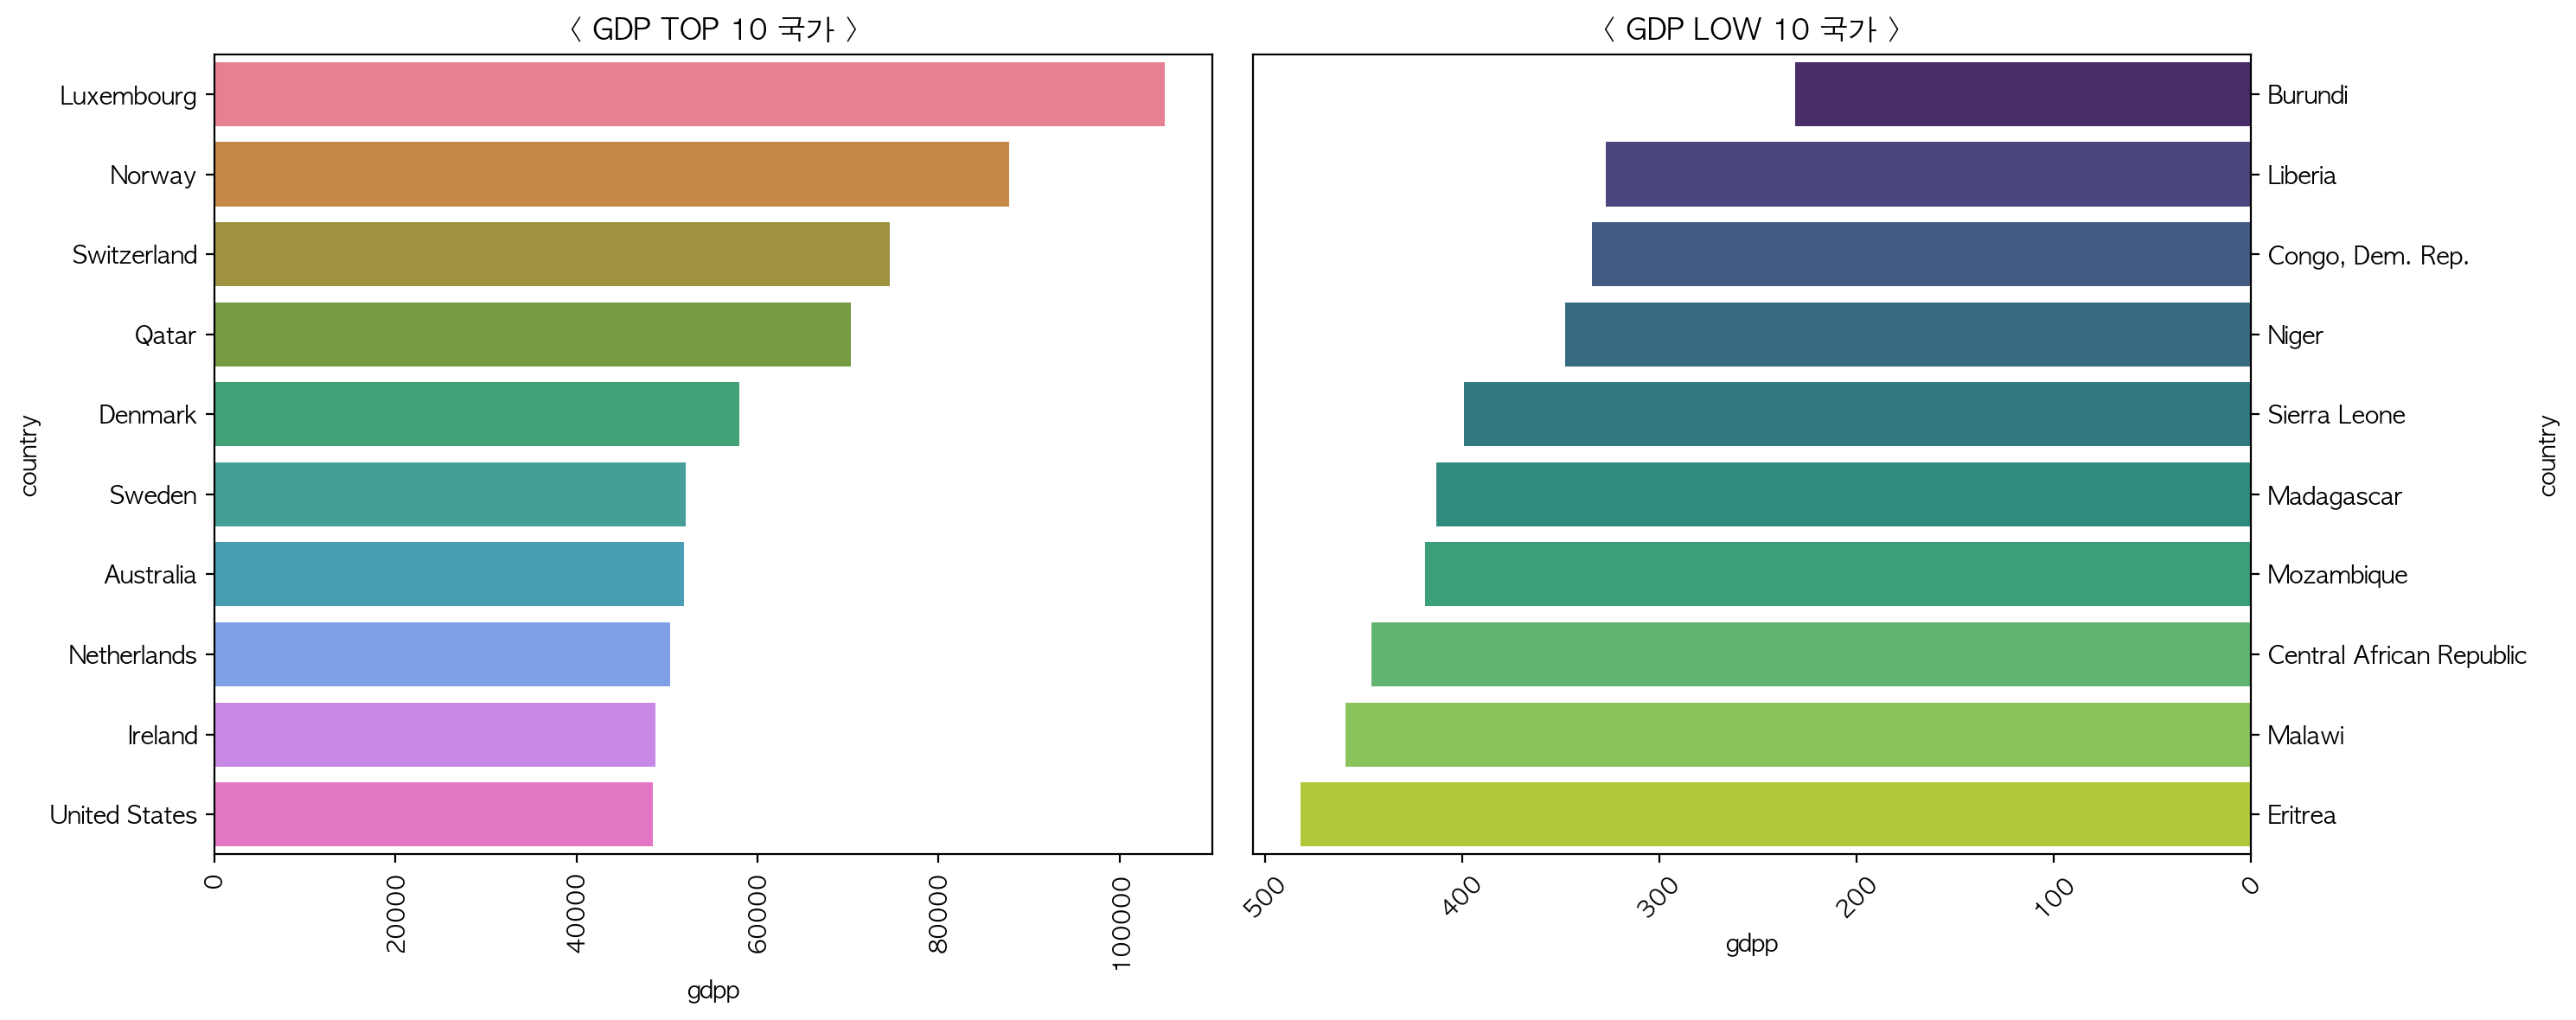

In [55]:
plt.figure(figsize = (15, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.barplot(y = gdpp_top_df["country"], x = gdpp_top_df["gdpp"], orient = "h", palette="husl")
plt.xticks(rotation = 90)
plt.title("< GDP TOP 10 국가 >")

plt.subplot(1, 2, 2)
sns.barplot(y = gdpp_low_df["country"], x = gdpp_low_df["gdpp"], orient = "h", palette="viridis")
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.xticks(rotation = 45)
plt.title("< GDP LOW 10 국가 >")
plt.tight_layout()

### exports

In [53]:
exports_top_df = df.sort_values(["exports"], ascending = False)[:10]

In [54]:
exports_low_df = df.sort_values(["exports"], ascending = True)[:10]

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2103/2507028322.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = exports_top_df["country"], x = exports_top_df["exports"], orient = "h", palette="husl")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2103/2507028322.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = exports_low_df["country"], x = exports_low_df["exports"], orient = "h", palette="viridis")


Text(0.5, 1.0, '< 수출 LOW 10 국가 >')

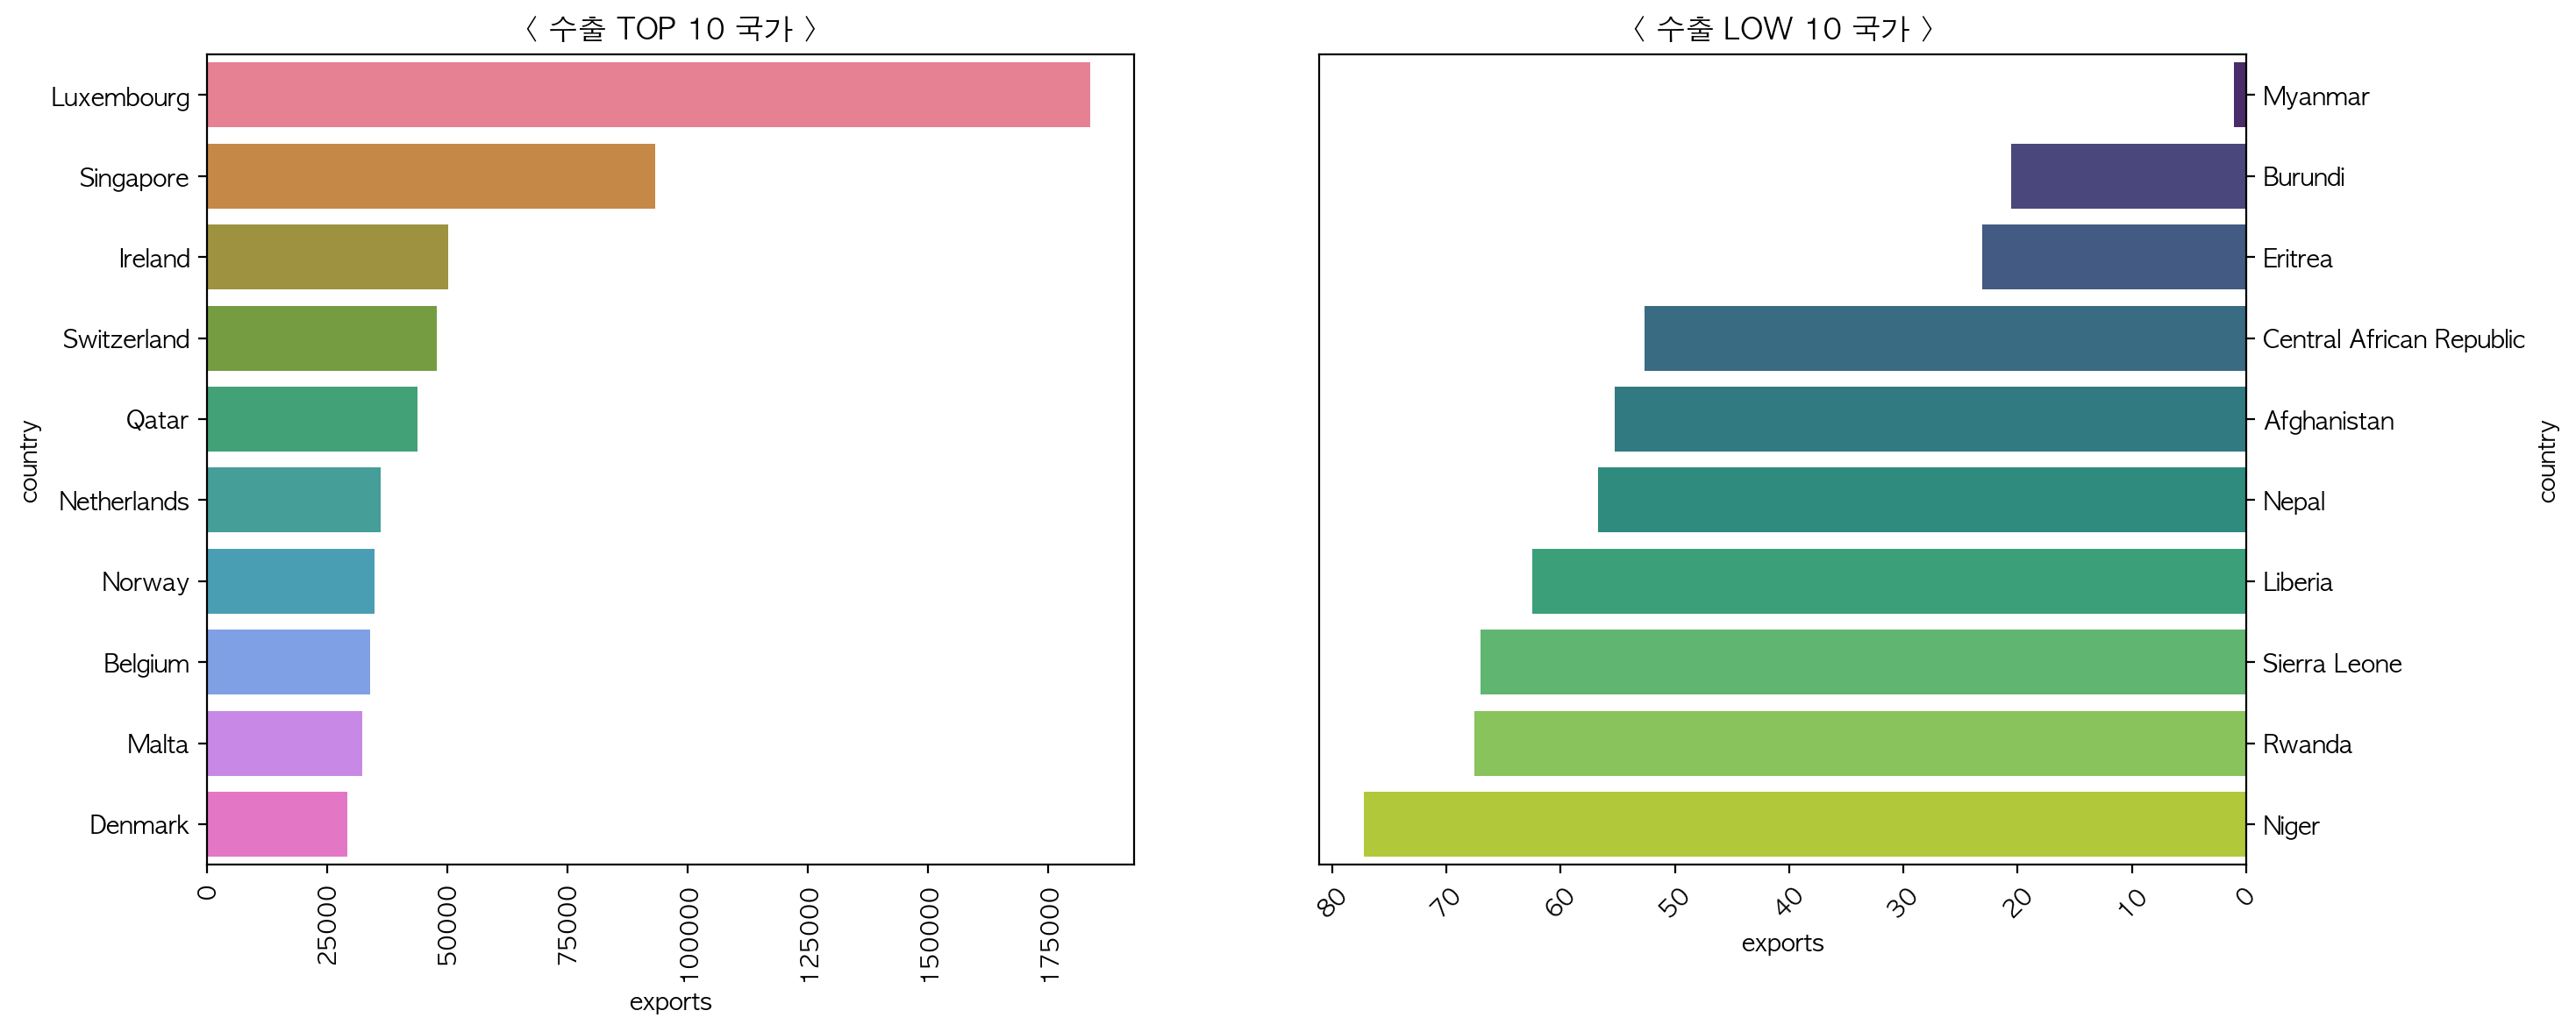

In [55]:
plt.figure(figsize = (15, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.barplot(y = exports_top_df["country"], x = exports_top_df["exports"], orient = "h", palette="husl")
plt.xticks(rotation = 90)
plt.title("< 수출 TOP 10 국가 >")

plt.subplot(1, 2, 2)
sns.barplot(y = exports_low_df["country"], x = exports_low_df["exports"], orient = "h", palette="viridis")
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.xticks(rotation = 45)
plt.title("< 수출 LOW 10 국가 >")

### health

In [56]:
health_top_df = df.sort_values(["health"], ascending = False)[:10]

In [57]:
health_low_df = df.sort_values(["health"], ascending = True)[:10]

In [65]:
health_low_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region,continent,latitude,longitude
50,Eritrea,55.2,23.08780,12.8212,112.306000,1420.0,11.60,61.7,4.61,482.0,Eastern Africa,Africa,15.179384,39.782334
93,Madagascar,62.2,103.25000,15.5701,177.590000,1390.0,8.79,60.8,4.60,413.0,Eastern Africa,Africa,-18.766947,46.869107
31,Central African Republic,149.0,52.62800,17.7508,118.190000,888.0,2.01,47.5,5.21,446.0,Middle Africa,Africa,6.611111,20.939444
112,Niger,123.0,77.25600,17.9568,170.868000,814.0,2.55,58.8,7.49,348.0,Western Africa,Africa,17.607789,8.081666
107,Myanmar,64.4,1.07692,19.4636,0.651092,3720.0,7.04,66.8,2.41,988.0,South-eastern Asia,Asia,21.913965,95.956223
106,Mozambique,101.0,131.98500,21.8299,193.578000,918.0,7.64,54.5,5.56,419.0,Eastern Africa,Africa,-18.665695,35.529562
116,Pakistan,92.1,140.40000,22.8800,201.760000,4280.0,10.90,65.3,3.85,1040.0,Southern Asia,Asia,30.375321,69.345116
37,"Congo, Dem. Rep.",116.0,137.27400,26.4194,165.664000,609.0,20.80,57.5,6.54,334.0,Middle Africa,Africa,-4.038333,21.758664
12,Bangladesh,49.4,121.28000,26.6816,165.244000,2440.0,7.14,70.4,2.33,758.0,Southern Asia,Asia,23.684994,90.356331
26,Burundi,93.6,20.60520,26.7960,90.552000,764.0,12.30,57.7,6.26,231.0,Eastern Africa,Africa,-3.373056,29.918886


/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1494/2654759212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = health_top_df["country"], x = health_top_df["health"], orient = "h", palette="husl")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_1494/2654759212.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = health_low_df["country"], x = health_low_df["health"], orient = "h", palette="viridis")


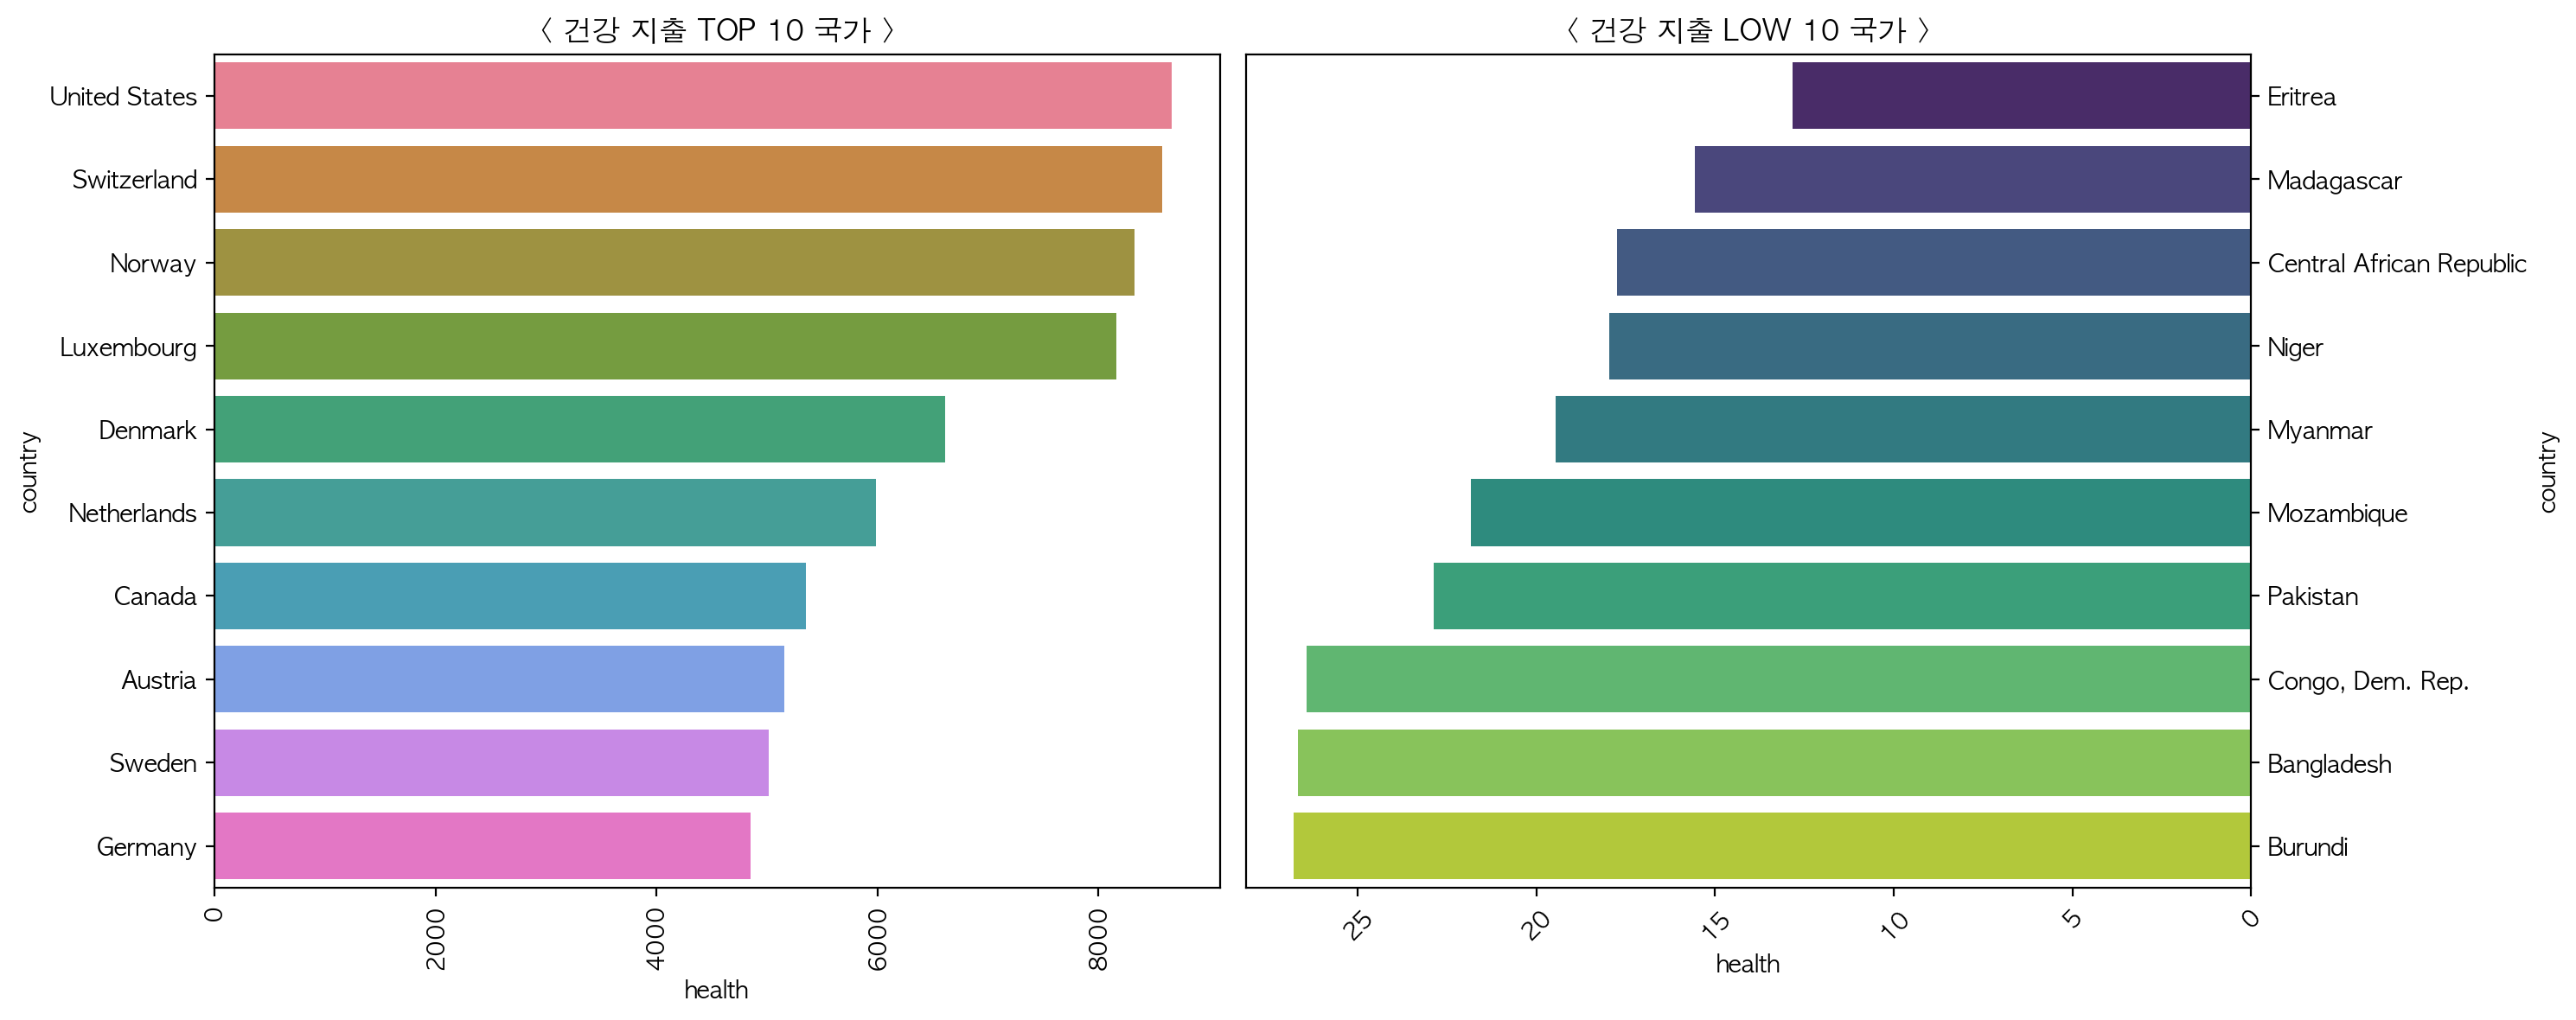

In [60]:
plt.figure(figsize = (15, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.barplot(y = health_top_df["country"], x = health_top_df["health"], orient = "h", palette="husl")
plt.xticks(rotation = 90)
plt.title("< 건강 지출 TOP 10 국가 >")

plt.subplot(1, 2, 2)
sns.barplot(y = health_low_df["country"], x = health_low_df["health"], orient = "h", palette="viridis")
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.xticks(rotation = 45)
plt.title("< 건강 지출 LOW 10 국가 >")
plt.tight_layout()

### imports

In [59]:
imports_top_df = df.sort_values(["imports"], ascending = False)[:10]

In [60]:
imports_low_df = df.sort_values(["imports"], ascending = True)[:10]

/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2103/2919145766.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = imports_top_df["country"], x = imports_top_df["imports"], orient = "h", palette="husl")
/var/folders/99/kvxjdlbx2fv46xhlz05p7mp40000gn/T/ipykernel_2103/2919145766.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = imports_low_df["country"], x = imports_low_df["imports"], orient = "h", palette="viridis")


Text(0.5, 1.0, '< 수입 LOW 10 국가 >')

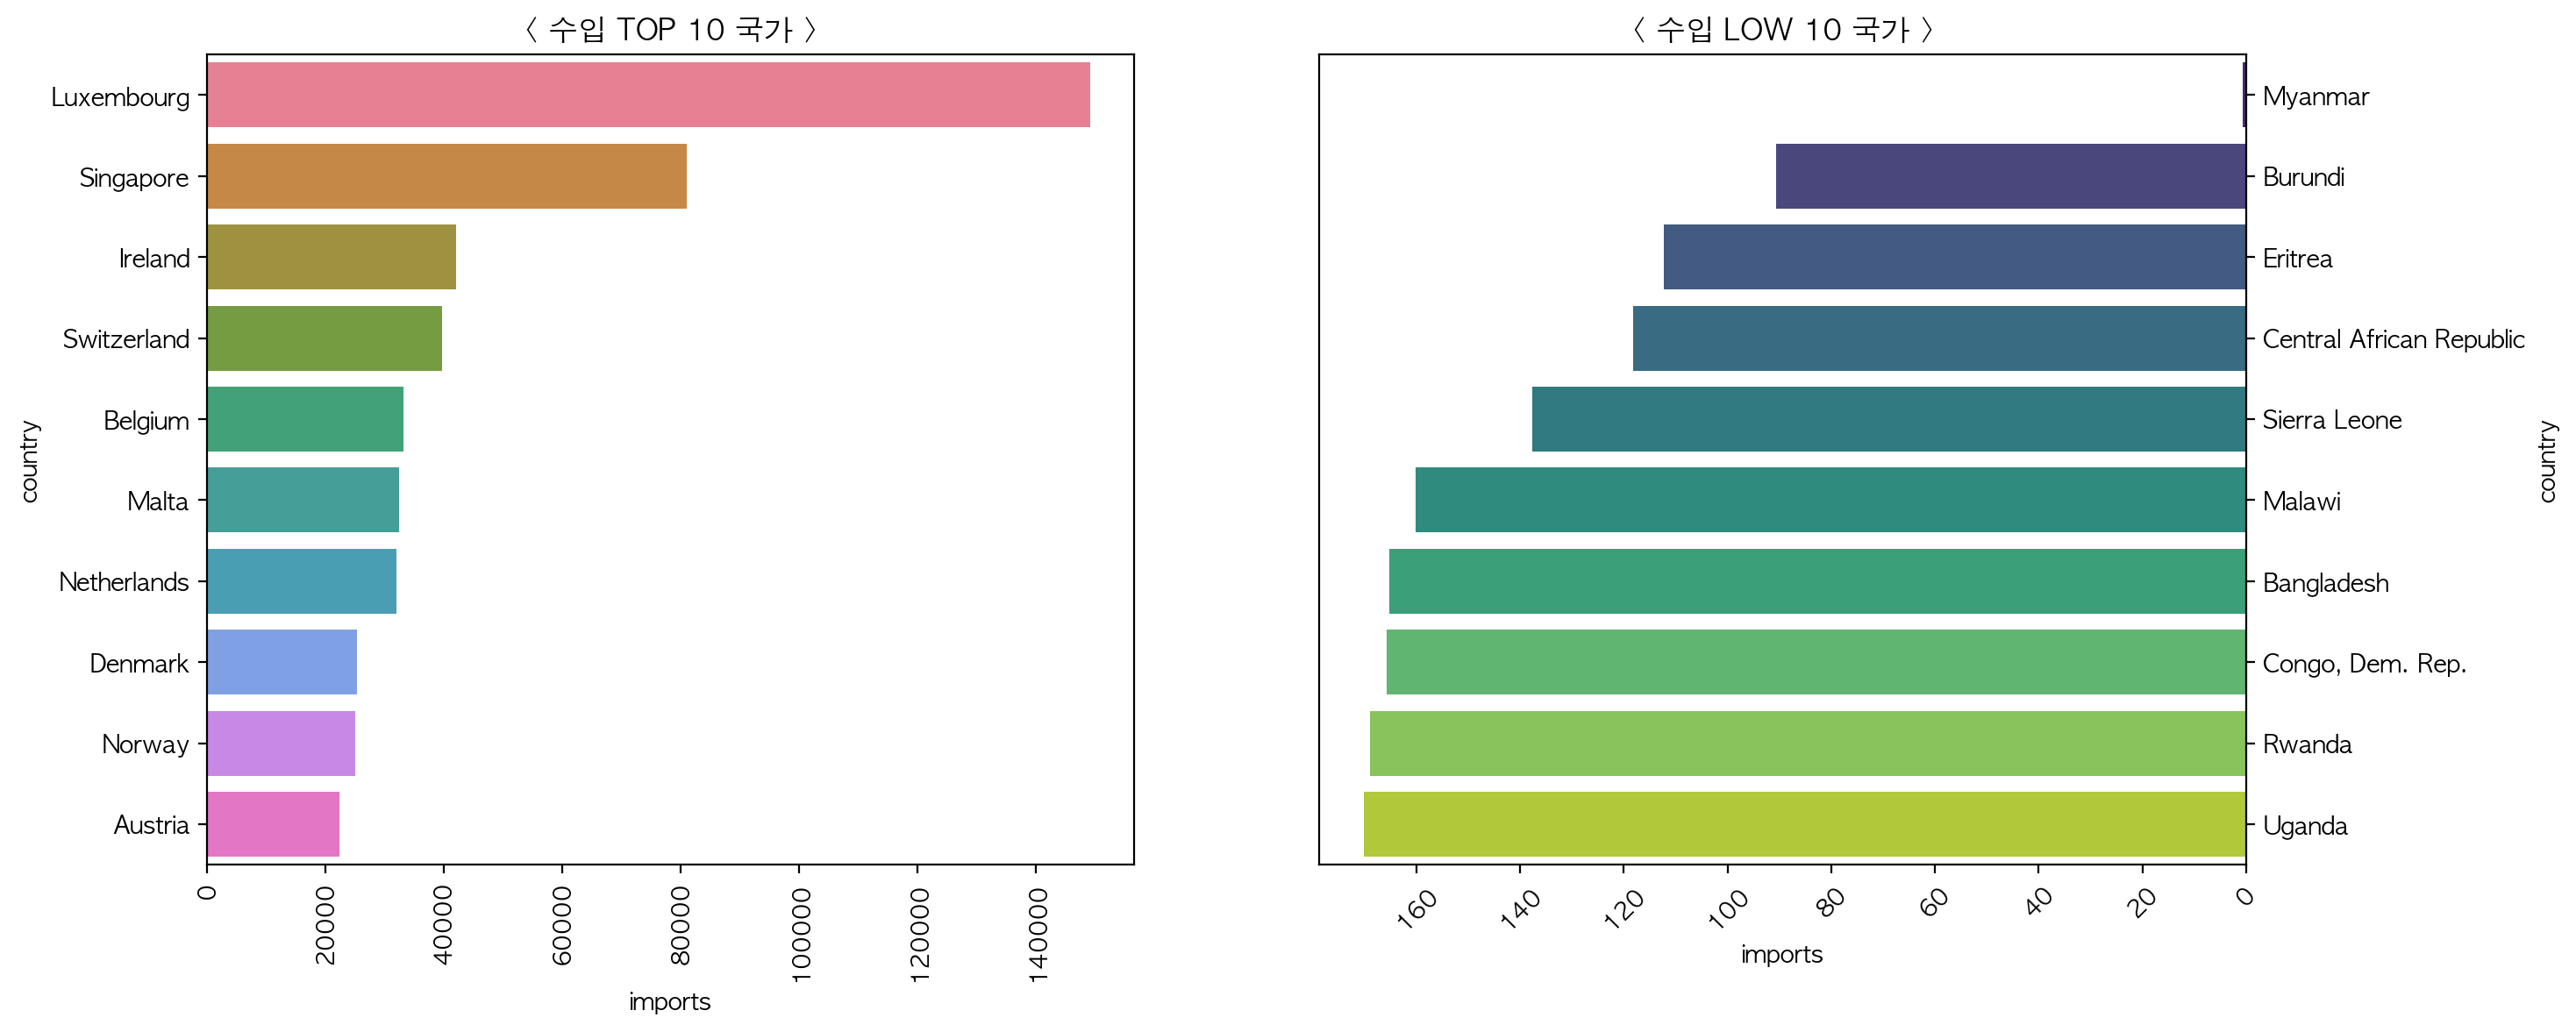

In [61]:
plt.figure(figsize = (15, 6), dpi = 200)

plt.subplot(1, 2, 1)
sns.barplot(y = imports_top_df["country"], x = imports_top_df["imports"], orient = "h", palette="husl")
plt.xticks(rotation = 90)
plt.title("< 수입 TOP 10 국가 >")

plt.subplot(1, 2, 2)
sns.barplot(y = imports_low_df["country"], x = imports_low_df["imports"], orient = "h", palette="viridis")
plt.gca().invert_xaxis()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.xticks(rotation = 45)
plt.title("< 수입 LOW 10 국가 >")

## 상관계수 히트맵으로 확인하기

In [67]:
cor_df = df.drop(["latitude", "longitude"], axis = 1)

In [68]:
cor_df.corr(numeric_only = True)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


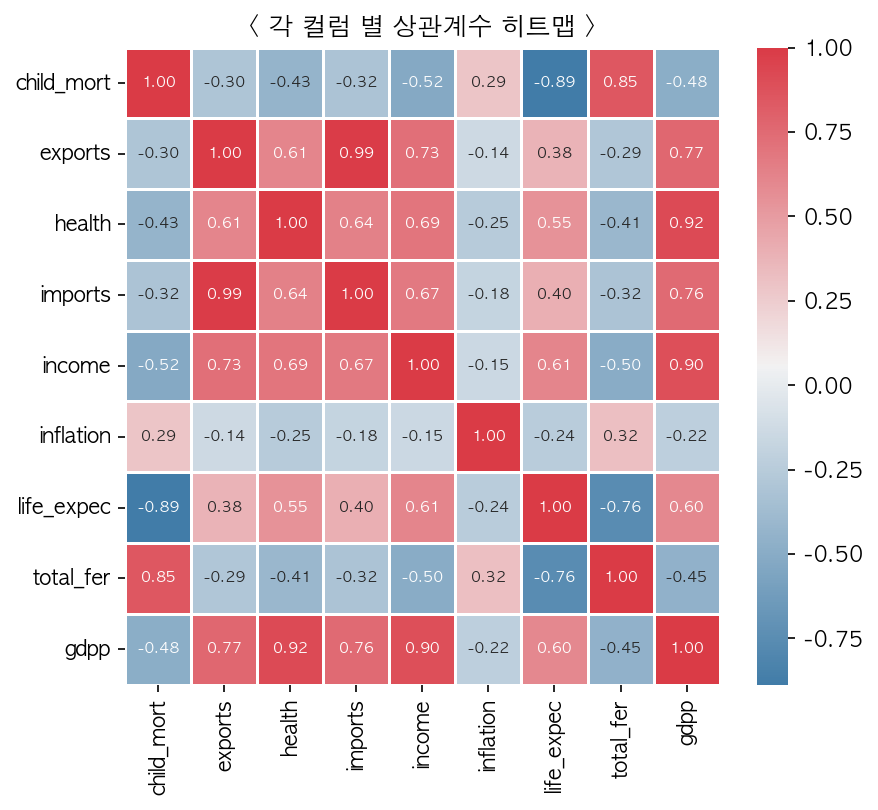

In [72]:
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
plt.figure(figsize = (6, 5.5), dpi = 150)

_ = sns.heatmap(
    cor_df.corr(numeric_only = True), 
    annot=True, 
    fmt=".2f",
    cmap = cmap,
    linewidths=.5, 
    annot_kws={"size": 7}
)
plt.title("< 각 컬럼 별 상관계수 히트맵 >")
plt.tight_layout()

# 전처리 데이터 내보내기

In [163]:
df.to_csv("./data/preprocessed_country.csv", encoding = "utf-8", index = False)